{'msd/blu_600_li.txt': 6.993162452692344e-09, 'msd/blu_500_li.txt': 1.624059872250327e-09, 'msd/blu_400_li.txt': 1.2174864313826564e-10, 'msd/blu_300_li.txt': 4.9216939043528155e-12}
{'msd/blu_600_li.txt': 3.2706242985483414, 'msd/blu_500_li.txt': 0.9114656866180912, 'msd/blu_400_li.txt': 0.08541072939253665, 'msd/blu_300_li.txt': 0.004603642996280254}


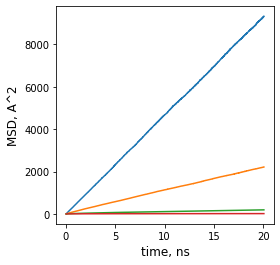

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import glob

d = 3

files = glob.glob('msd/*.txt')
diffusion_dict = {}
conductivity_dict = {}

def plot_msd(msd_file):  

    # Import MSD files as lists:
    step, msd = np.loadtxt(msd_file, skiprows=2, unpack=True)
    
    # Find T:
    TT = msd_file[8:]
    T = float(TT[:3])
    
    # Convert to nanoseconds:
    steps = step / 1000000
    
    # Remove initial jump:
    msd = msd - msd[1]

    # Plot MSD:   
    plt.plot(steps[1:], msd[1:])
    
    # Find diffusion coefficient:
    slope, intercept = np.polyfit(steps[10000:], msd[10000:], 1)
    dc = float(slope * (10 ** (-11)) / 2*d)
    diffusion_dict[msd_file] = dc
    
        # Diffusion coefficient = d(msd)/d(t) / 2d
        #
        # unit conversion: A^2 to m^2 is 10**-20; ns to s is 10**9, so unit conversion is 10**-11
    
    # Find conductivity:
    cond = (((1.602 * 10**(-19))**2 * (1.510 * 10**(28)) * dc)/((1.381 * 10**(-23)) * T) * 10**(-2))
    conductivity_dict[msd_file] = cond
    
        # Conversion of diffusion coefficient to conductivity as follows:
        #
        # conducitivity = (charge**2 * charge carrier concentration * diffusion coefficient) / boltzmann constant * temperature
        #
        # charge is electron charge (sodium singularly charged), so 1.602 * 10**(-19) C
        #
        # charge carrier concentration calculated as number of Li/Sc/Cl ions in the simulation cell/cell dimensions
        #
        # diffusion coefficient calcualted as above fromm MSD plot slopes
        #
        # boltzmann constant = 1.381 * 10**(-23) J/K
        #
        # temperature varies with experiment
        #
        # !!! 10**(-2) added to get final results in S/cm as conventionally displayed
    

for f in files:
    plot_msd(f)
    
plt.xlabel('time, ns', size = 12)
plt.ylabel('MSD, A^2', size = 12)

print(diffusion_dict)
print(conductivity_dict)

def make_square_axes(ax):
    """Make an axes square in screen units.

    Should be called after plotting.
    """
    ax.set_aspect(1 / ax.get_data_ratio())

make_square_axes(plt.gca())

plt.savefig('msd_blue.jpg', bbox_inches='tight', dpi=500)

In [33]:
example = 'msd/red_300_li.txt'

In [38]:
e = example[8:]

In [39]:
e[:3]

'300'